
# <center>Multiple Regresi Linear</center>


#### Tentang Notebook
Dalam notebook ini, akan dipelajari cara menggunakan scikit-learn untuk mengimplementasikan regresi linier variabel jamak. Data yang dipakai adalah kumpulan data yang terkait dengan, ukuran mesin, silinder, konsumsi bahan bakar dengan emisi karbon dioksida mobil. Kemudian, data dibagi menjadi data pelatihan dan data pengujian, kemudian pembuatan model menggunakan dataset pelatihan, evaluasi model menggunakan dataset pengujian, dan akhirnya penggunaan model untuk memprediksi nilai yang tidak diketahui


### Import packages yang diperlukan

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Pengunduhan Data
Untuk mengunduh data, gunakan !wget dengan URL yang diberikan.

In [2]:
!wget -O iya.csv https://raw.githubusercontent.com/SandalsPhone/umm-p-hmm-tbdin2/main/DKI%20JAKARTA%2030-11-20%20to%2026-11-21%20Jakarta%20Pusat.csv --no-check-certificate

--2021-12-05 13:23:28--  https://raw.githubusercontent.com/SandalsPhone/umm-p-hmm-tbdin2/main/DKI%20JAKARTA%2030-11-20%20to%2026-11-21%20Jakarta%20Pusat.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 13690 (13K) [text/plain]
Saving to: 'iya.csv'

     0K .......... ...                                        100% 1.13M=0.01s

2021-12-05 13:23:29 (1.13 MB/s) - 'iya.csv' saved [13690/13690]



In [3]:
df = pd.read_csv("iya.csv")

# melihat dataset
df.head()



,Tanggal,Beras,Bawang_Merah,Bawang_Putih,Cabai_Merah,Cabai_Rawit,TAVG,RH_AVG,RR,ss
0,30/11/2020,13450,37500,37500,53350,40400,27.6,81,1.0,1.4
1,1/12/2020,13450,37500,37500,53350,40400,29.2,73,8888.0,1.0
2,2/12/2020,13450,37500,37500,54150,41650,29.6,75,0.0,8.1
3,3/12/2020,13450,37500,37500,62500,41650,26.7,84,41.4,7.8
4,4/12/2020,13450,37500,37500,64600,43350,27.9,84,2.2,0.0


### Eksplorasi Data
Eksplorasi deskriptif data yang diunduh.

In [4]:
# merangkum data
df.describe()

,Beras,Bawang_Merah,Bawang_Putih,Cabai_Merah,Cabai_Rawit,TAVG,RH_AVG,RR,ss
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,13354.732510,35973.868313,35164.403292,47917.078189,55902.880658,28.548148,78.378601,664.632922,5.046914
std,86.412848,3531.933170,1164.407749,14109.602941,23605.829314,0.989462,6.228158,2330.767406,3.392045
min,13250.000000,26650.000000,33650.000000,28350.000000,27900.000000,25.300000,61.000000,0.000000,0.000000
25%,13250.000000,33350.000000,34150.000000,33350.000000,35400.000000,27.900000,74.000000,0.000000,1.850000
50%,13400.000000,35850.000000,35000.000000,50000.000000,49600.000000,28.800000,79.000000,0.200000,5.200000
75%,13450.000000,37750.000000,35850.000000,60000.000000,80850.000000,29.250000,83.000000,8.000000,7.950000
max,13450.000000,45000.000000,38350.000000,72100.000000,109150.000000,30.600000,93.000000,8888.000000,11.200000


Beberapa fitur dapat dieksplorasi dengan cara berikut.

In [5]:
cdf = df[['Beras','TAVG','RH_AVG','ss']]
cdf.head(10)

,Beras,TAVG,RH_AVG,ss
0,13450,27.6,81,1.4
1,13450,29.2,73,1.0
2,13450,29.6,75,8.1
3,13450,26.7,84,7.8
4,13450,27.9,84,0.0
5,13450,25.7,90,0.0
6,13450,28.8,80,0.0
7,13450,28.1,81,4.9
8,13450,28.5,81,2.4
9,13450,28.1,79,1.3


Fitur-fitur tersebut dapat diplot sebagai berikut:

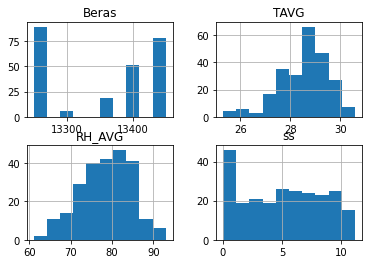

In [6]:
viz = cdf[['Beras','TAVG','RH_AVG','ss']]
viz.hist()
plt.show()

Plot fitur-fitur vs emisi dapat dibuat dan dapat dilihat linearitas hubungannya.

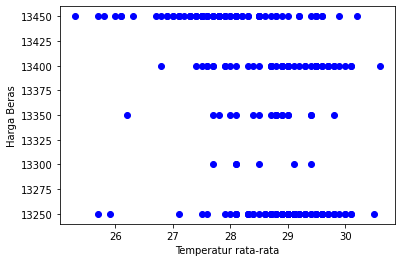

In [7]:
plt.scatter(cdf.TAVG, cdf.Beras,  color='blue')
plt.xlabel("Temperatur rata-rata")
plt.ylabel("Harga Beras")
plt.show()

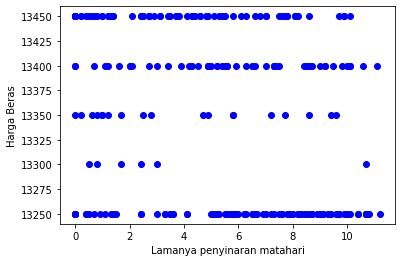

In [8]:
plt.scatter(cdf.ss, cdf.Beras,  color='blue')
plt.xlabel("Lamanya penyinaran matahari")
plt.ylabel("Harga Beras")
plt.show()

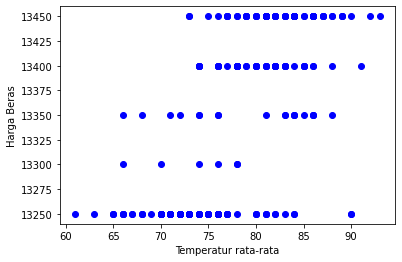

In [9]:
plt.scatter(cdf.RH_AVG, cdf.Beras,  color='blue')
plt.xlabel("Temperatur rata-rata")
plt.ylabel("Harga Beras")
plt.show()

#### Pembuatan dataset pelatihan dan pengujian
Pemisahan data latih/uji melibatkan pemisahan dataset menjadi dataset pelatihan dan pengujian, yang saling eksklusif. Setelah itu, dataset pelatihan dapat digunakan untuk membuat model dan dataset pengujian untuk pengujian.
Hal ini akan memberikan evaluasi yang lebih akurat pada akurasi out-of-sample karena dataset pengujian bukan merupakan bagian dari dataset yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa hasil dari setiap titik data dalam kumpulan data ini diketahui, sehingga sangat bagus untuk data pengujian. Dataset pengujian belum digunakan untuk melatih model, sehingga model tidak memiliki pengetahuan tentang hasil dari data ini, sehingga dapat disebut pengujian di luar sampel.



In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Model Regresi Variabel Jamak
Regresi Linier cocok dengan model linier dengan koefisien B = (B1, ..., Bn) untuk meminimalkan 'jumlah kuadrat sisa (residu)' antara x bebas (X1, ..., Xn) dalam kumpulan data, dan y tak bebas dengan pendekatan linier.

#### Distribusi Data Pelatihan

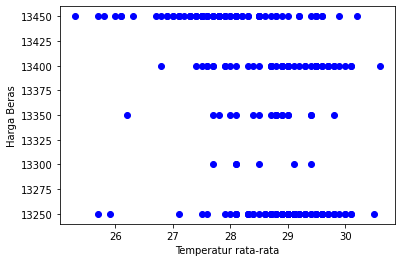

In [11]:
plt.scatter(cdf.TAVG, cdf.Beras,  color='blue')
plt.xlabel("Temperatur rata-rata")
plt.ylabel("Harga Beras")
plt.show()

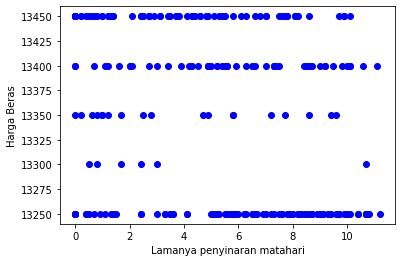

In [12]:
plt.scatter(cdf.ss, cdf.Beras,  color='blue')
plt.xlabel("Lamanya penyinaran matahari")
plt.ylabel("Harga Beras")
plt.show()

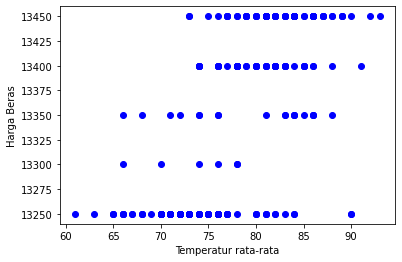

In [13]:
plt.scatter(cdf.RH_AVG, cdf.Beras,  color='blue')
plt.xlabel("Temperatur rata-rata")
plt.ylabel("Harga Beras")
plt.show()

#### Pemodelan
Menggunakan sklearn package untuk memodelkan data.

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['TAVG','RH_AVG','ss']])
train_y = np.asanyarray(train[['Beras']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[13.29429872  9.29822997 -4.24529211]]
Intercept:  [12265.85365617]


Seperti disebutkan sebelumnya, __koefisien__ dan __intercept__ dalam regresi linier sederhana, adalah parameter dari garis yang cocok dengan data.
Perhatikan bahwa semua data harus tersedia untuk menghitung parameter.


#### Evaluasi
Nilai aktual dan nilai prediksi dapat dibandingkan untuk menghitung akurasi dari model regresi. Metrik evaluasi sangat penting untuk pengembangan model karena memberikan pengetahuan untuk perbaikan model.

Ada berbagai metrik untuk evaluasi model, misalnya MSE sebagai error untuk mengetahui akurasi dari model yang dibangun yang dihitung dari MSE model terhadap data pengujian: 
    - Mean Absolute Error (MAE): Rerata dari nilai absolut dari error. MAE adalah metrik paling mudah dipahami karena hanya rata-rata dari error.
    - Mean Squared Error (MSE): adalah rerata dari error dikuadratkan. MSE lebih populer dibanding MAE karena fokus pada error yang besar karena dikuadratkan sehingga berdampak lebih besar terhadap error yang lebih besar dibandingkan error yang lebih kecil.
    - Root Mean Squared Error (RMSE).
    - R-squared bukan error namun metrik yang populer yang merepresentasikan sejauh mana data cocok dengan garis regresi yang didapatkan. Semakin besar R-squared akan semaki baik pencocokan garis terhadap data. Nilai terbaik adalah 1.0 dan dapat bernilai negatif.


In [15]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['TAVG','RH_AVG','ss']])
test_y = np.asanyarray(test[['Beras']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 52.64
Residual sum of squares (MSE): 3612.95
R2-score: -0.24
